# Estimación de la demanda de dinero

**Nota** Para ejecutar este cuaderno se requiere el paquete `bccr`. Si no lo tiene, ejecute la siguiente celda

In [1]:
try:
    import bccr
except ImportError:
    print('Module bccr missing. Installing it now')
    !pip install bccr

In [2]:
from bccr import SW
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib.gridspec as gridspec

import statsmodels.api as sm
from statsmodels.formula.api import ols


In [3]:
plt.style.use('seaborn')

# Cambiar tamaño de las fuentes
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 16
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

In [4]:
SW.buscar('medio circulante')

,DESCRIPCION,descripcion,Unidad,Medida,periodo
codigo,,,,,
1445,Node('/BCCR/Sector Monetario y Financiero/Medio circulante sistema bancario nacional [1445]'),Medio circulante,Colón Costarricense,Millones,Mensual
1479,Node('/BCCR/Sector Monetario y Financiero/Medio circulante sistema financiero nacional [1479]'),Medio circulante,Colón Costarricense,Millones,Mensual
2936,Node('/BCCR/Sector Monetario y Financiero/Medio circulante sistema financiero nacional [1479]/Otros activos netos [2...,Otros activos netos,Colón Costarricense,Millones,Mensual


In [5]:
SW.buscar('tasa básica pasiva', frecuencia='D')

,DESCRIPCION,descripcion,Unidad,Medida,periodo
codigo,,,,,
423,Node('/BCCR/Tasas de interés/Tasa básica pasiva calculada por el BCCR [423]'),Tasa Básica pasiva bruta calculada por el Banco Central.,Porcentaje,NO DEFINIDO,Diaria


In [6]:
variables = dict(IMAE=35449,IPC=25482,M1=1445,Tbasica=423)
datos = SW(**variables, func='mean', FechaInicio='1991m01', FechaFinal='2020m11').dropna()
datos

,IMAE,IPC,M1,Tbasica
fecha,,,,
1991-01,51.108817,8.064069,6.158123e+04,34.000000
1991-02,42.665858,8.301969,6.024168e+04,35.000000
1991-03,40.391637,8.407419,5.942290e+04,33.193548
1991-04,40.185649,8.644489,6.078601e+04,33.000000
1991-05,40.276545,8.794029,6.185368e+04,32.500000
...,...,...,...,...
2020-07,110.987099,106.127077,5.166828e+06,3.708065
2020-08,110.584336,106.122788,5.206881e+06,3.635484
2020-09,113.705524,106.411930,5.206211e+06,3.498333


In [7]:
res = ols('M1 ~ IMAE + IPC + Tbasica', data=np.log(datos)).fit()

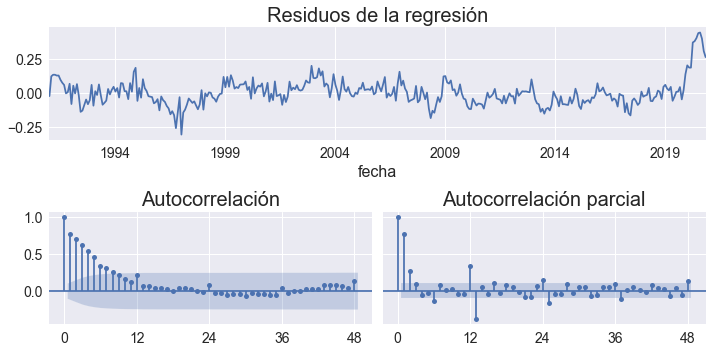

In [8]:
fig = plt.figure(figsize=[10,5], tight_layout=True)
gs = gridspec.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, :])
axs0 = fig.add_subplot(gs[1,0])
axs1 = fig.add_subplot(gs[1,1], sharey=axs0)

res.resid.plot(title='Residuos de la regresión', ax=ax)

OPCIONES = dict(lags=48, alpha=0.05, )
sm.graphics.tsa.plot_acf(res.resid, ax=axs0, title='Autocorrelación',**OPCIONES);
sm.graphics.tsa.plot_pacf(res.resid, ax=axs1, title='Autocorrelación parcial', **OPCIONES);
axs0.set_xticks([0,12,24,36,48])
axs1.set_xticks([0,12,24,36,48])

fig.savefig('residuos-demanda-dinero.pdf', bbox_inches='tight')

In [11]:
sss = res.summary()
sss

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     M1   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.944e+04
Date:                Sat, 23 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:40:55   Log-Likelihood:                 335.36
No. Observations:                 359   AIC:                            -662.7
Df Residuals:                     355   BIC:                            -647.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3294      0.298     21.263      0.000       5.744       6.915
IMAE           1.0242      0.079     13.044      0.000       0.870       1.179
IPC            0.9268      0.028     33.508      0.000       0.872       0.981
Tbasica       -0.3519      0.022    -15.919      0.000      -0.395      -0.308
==============================================================================
Omnibus:                      115.244   Durbin-Watson:                   0.450
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              463.868
Skew:                           1.349   Prob(JB):                    1.87e-101
Kurtosis:                       7.872   Cond. No.                         390.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
sss.tables[2]

Omnibus:,115.244,Durbin-Watson:,0.450
Prob(Omnibus):,0.000,Jarque-Bera (JB):,463.868
Skew:,1.349,Prob(JB):,1.87e-101
Kurtosis:,7.872,Cond. No.,390.


In [13]:
sss = res.summary()

with open('regresion-M1.tex','w') as file:
    file.write(sss.tables[1].as_latex_tabular())
    file.write(sss.tables[2].as_latex_tabular())